In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv("Churn_Modelling.csv",index_col='RowNumber')

### Dataset Overview

- Sample Observation Overview  
- Column Names  
- Distribution of Response Variable - Exited
- Correlation Plot

In [3]:
# Looking for NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# check all columns
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Response Variable - Exited

- Exited=0 active customer
- Exited=1 churned customer

In [4]:
data['Exited'].value_counts() # mostly not exited customers

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Counts of Two Types of Customers')

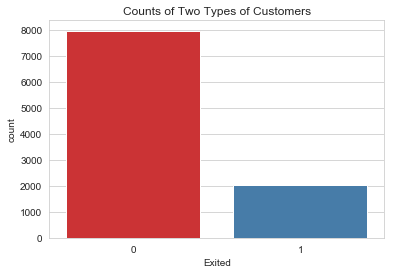

In [5]:
sns.countplot(data['Exited'], palette='Set1')
plt.title('Counts of Two Types of Customers')
# as expected, most customers did not churn

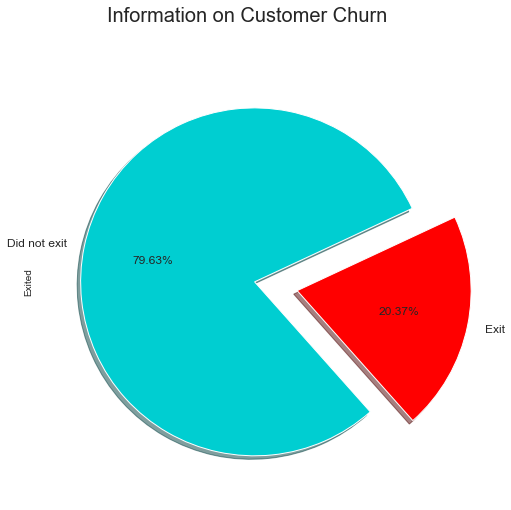

In [4]:
f, ax = plt.subplots(1,1, figsize=(8,8))

colors = ["darkturquoise", "red"]
labels ="Did not exit", "Exit"

plt.suptitle('Information on Customer Churn', fontsize=20)

data["Exited"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
#ax.set_xlabel('% of Condition of Loans', fontsize=14)

### Overall Distribution Plots For Features

- Histogram of all features
- Discrete: Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember
- Continuous: CreditScore, Age, Balance, EstimatedSalary

Text(0.5, 1.0, 'Counts of Origins of Customers')

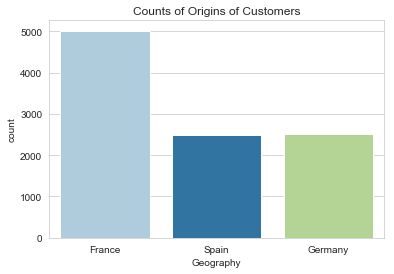

In [22]:
sns.countplot(data['Geography'], palette="Paired")
plt.title('Counts of Origins of Customers')
# Most customers come from France

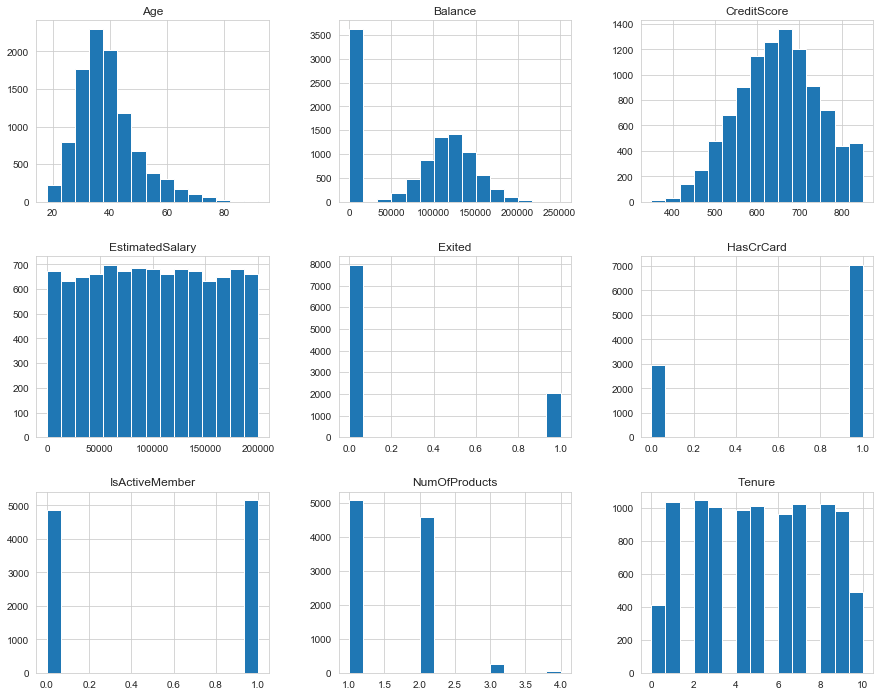

In [10]:
data.drop('CustomerId',axis=1).hist(figsize=(15,12), bins = 15)
plt.show()

-Age is slightly right-skewed, so there could be some pattern across two groups.
<br>
-Balance is fairly normally distributed except when balance=0. I suspect those are churned customers.
<br>
-Most credit scores are over 600, so it is possible that some high quality customer churned.
<br>
-Estimated Salary is spread across various values.
<br>
-Most customers have a credit card with the bank. Are there any customers churned after having the credit card? Is it because of lower limit or high intro APR suggesting dissatifactory of bank's card?
<br>
-Around half customers are active while half are not. Did any of active customers churned?
<br>
-Most customers have less than two products (majority has 1). It will be interesting to see if customers with more than 2 products churned. This will be indicating that they are not really satisfied with products after trying a few.
<br>
-Tenure of customers are also fairly spread out, concentrating between 2-8 years.

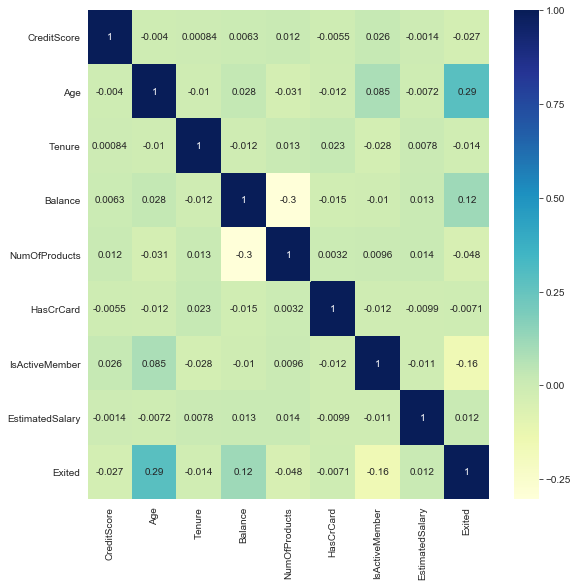

In [32]:
plt.figure(figsize=(9,9))
p=sns.heatmap(data.drop('CustomerId',axis=1).corr(), annot=True, cmap="YlGnBu")
# no multicollinearity here

In [40]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

### Continuous Variables

- Histograms and Boxplot of CreditScore, Age, Balance, EstimatedSalary

In [28]:
def plot_continuous(df, variable, hue_choice, palette_choice=None):
    """Function to plot the distribution of a specified variable by class in histogram.
    
    Args:
        df (DataFrame): A DataFrame with values to plot.
        variable (str): Variable of interest.
        hue_choice (str): Variable which splits data into classes.
        palette_choice (str, optional): Color on bins. Defaults to None.
        
    """
    g = sns.FacetGrid(df, hue=hue_choice, sharex=True, sharey=True, palette=palette_choice, height=6, aspect=2)
    g = g.map(plt.hist, variable, bins=40, alpha=0.7).add_legend()

#### CreditScore

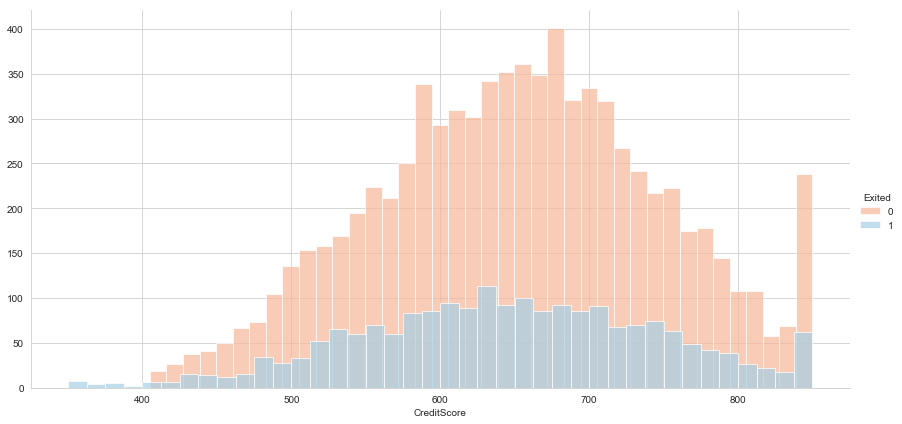

In [29]:
plot_continuous(data, 'CreditScore', 'Exited', "RdBu")

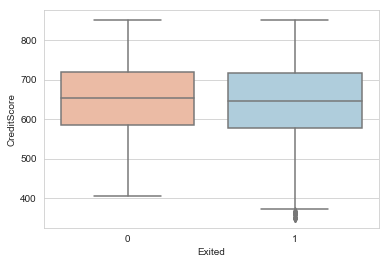

In [19]:
sns.boxplot(x='Exited', y='CreditScore', data=data, palette="RdBu")

overall distribution similar across two groups while churned customers have a left tail with extreme low score  
some customers with really low credit score (on the left) churned, as well as some with really high scores.

#### Age

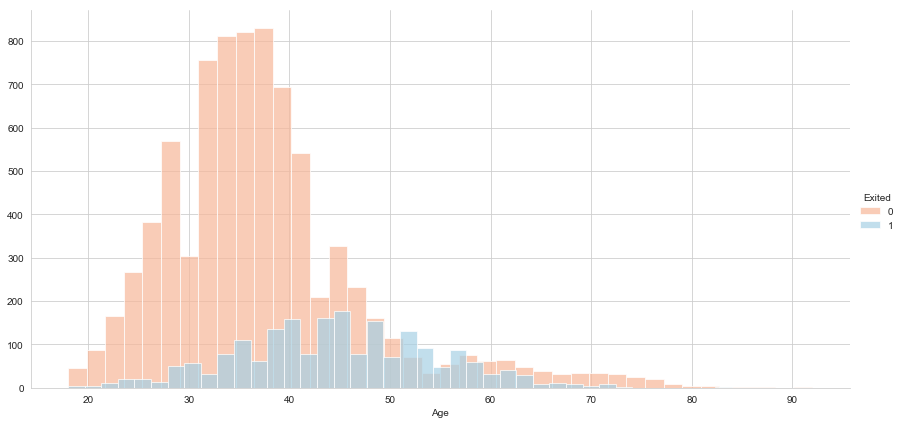

In [15]:
plot_continuous(data, 'Age', 'Exited', "RdBu")

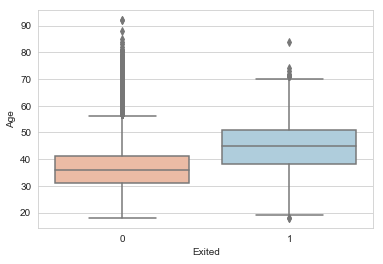

In [18]:
sns.boxplot(x='Exited', y='Age', data=data, palette="RdBu")

clear difference in age  
active customers have a right skewed distribution - outliers over 60 yrs old maybe stable service?  
churned customers mostly around 40-50 who need to support the whole family and think about retirement

#### Balance

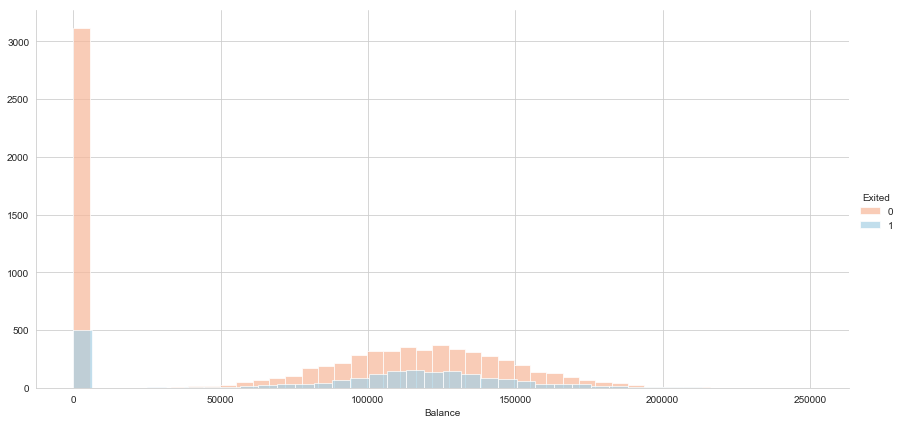

In [13]:
plot_continuous(data, 'Balance', 'Exited', "RdBu")

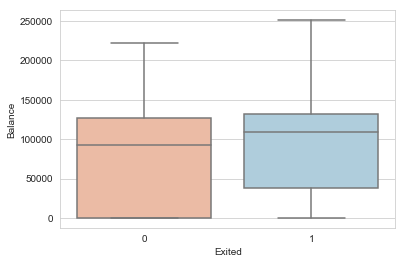

In [20]:
sns.boxplot(x='Exited', y='Balance', data=data, palette="RdBu")

overall distribution similar  
surprisingly some active customers in fact have low balances

#### EstimatedSalary

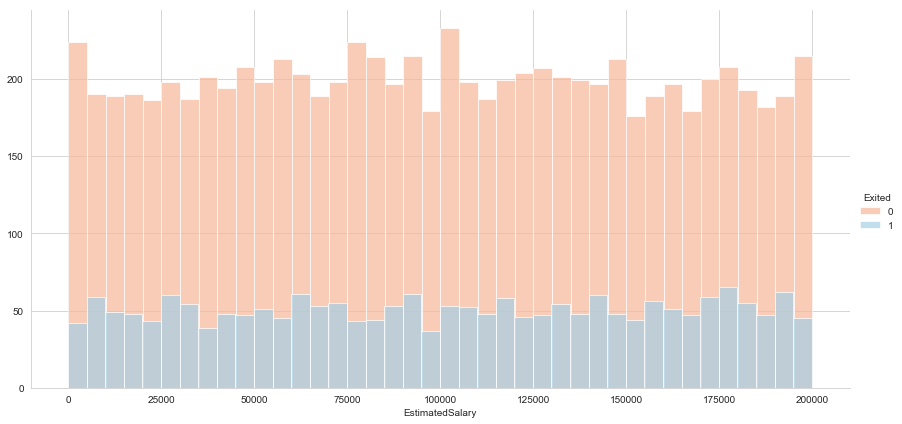

In [14]:
plot_continuous(data, 'EstimatedSalary', 'Exited', "RdBu")

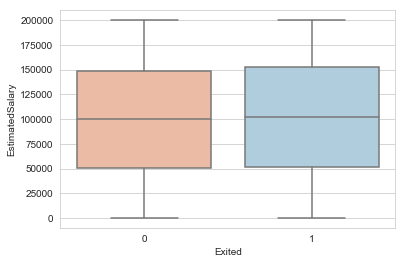

In [21]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data, palette="RdBu")

similar trend here across two groups...maybe estimated salary won't be decisive

### Discrete Variables

- Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember
- Distribution by Count and by Proportion

In [16]:
def plot_discrete(df, variable, hue_choice, palette_choice=None):
    """Function to plot the distribution of a specified variable by class.
    
    Args:
        df (DataFrame): A DataFrame with values to plot.
        variable (str): Variable of interest.
        hue_choice (str): Variable which splits data into classes.
        palette_choice (str, optional): Color on bins. Defaults to None.
        
    """
    sns.countplot(df[variable], palette=palette_choice, hue=df[hue_choice])
    plt.title('%s of Customers by Customer Type' % variable)

In [4]:
def plot_discrete_prop(df, variable, hue_choice, palette_choice=None):
    """Function to plot the proportional distribution of a specified variable by class.
    
    Args:
        df (DataFrame): A DataFrame with values to plot.
        variable (str): Variable of interest.
        hue_choice (str): Variable which splits data into classes.
        palette_choice (str, optional): Color on bins. Defaults to None.
        
    """
    prop_df = (df[variable]
           .groupby(df[hue_choice])
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())
    sns.barplot(x=variable, y='Proportion', hue=hue_choice, data=prop_df, palette=palette_choice)
    plt.title('Proportional Distribution of %s by Customer Type' % variable)
    #plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))

#### IsActiveMember

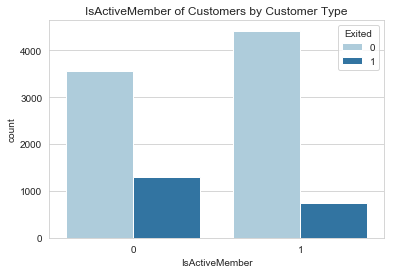

In [21]:
plot_discrete(data, 'IsActiveMember', 'Exited', 'Paired')

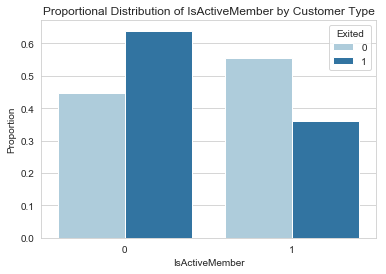

In [24]:
plot_discrete_prop(df=data, variable='IsActiveMember', hue_choice='Exited', palette_choice='Paired')

as expected, churned customers are generally not active members

#### Gender

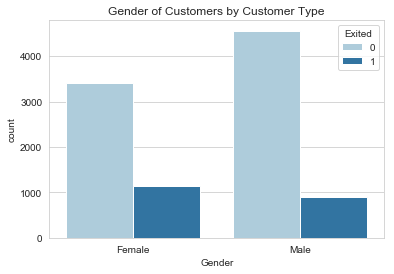

In [17]:
plot_discrete(data, 'Gender', 'Exited', 'Paired')

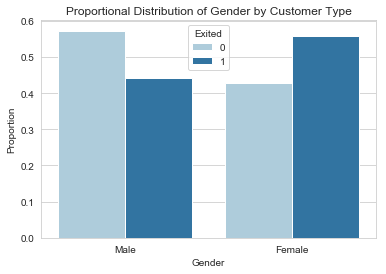

In [25]:
plot_discrete_prop(df=data, variable='Gender', hue_choice='Exited', palette_choice='Paired')

surprisingly more females churned - maybe the credit card or product dont offer good cash back on shopping and dining?

#### Geography

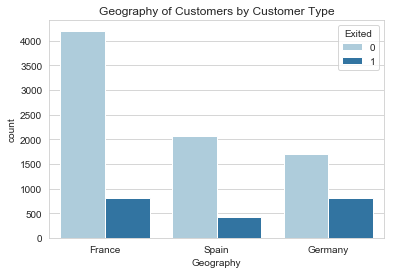

In [18]:
plot_discrete(data, 'Geography', 'Exited', 'Paired')

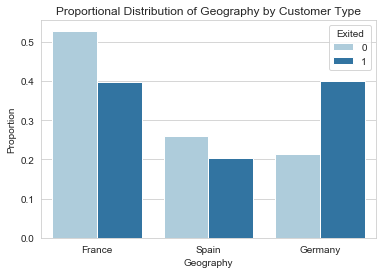

In [26]:
plot_discrete_prop(df=data, variable='Geography', hue_choice='Exited', palette_choice='Paired')

most customers are French   
more French and Germans churned

#### Tenure

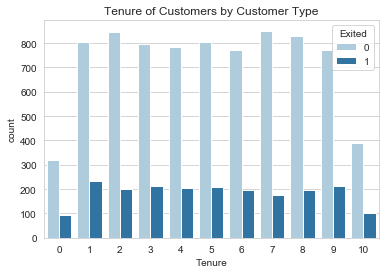

In [19]:
plot_discrete(data, 'Tenure', 'Exited', 'Paired')

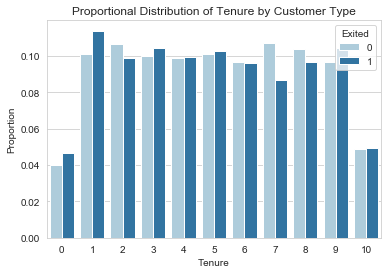

In [5]:
plot_discrete_prop(df=data, variable='Tenure', hue_choice='Exited', palette_choice='Paired')

among churned customers, some are new customers but some are old customers - 9 years  
need to find out why old customers are leaving

#### HasCrCard

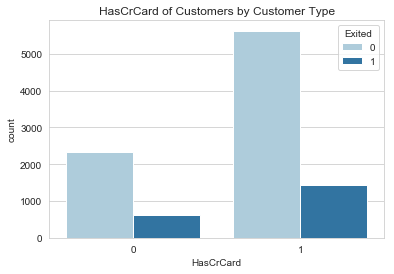

In [20]:
plot_discrete(data, 'HasCrCard', 'Exited', 'Paired')

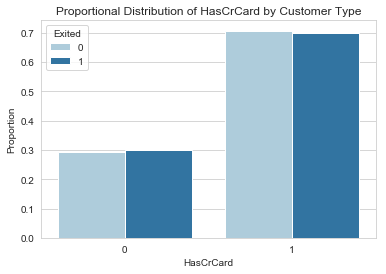

In [27]:
plot_discrete_prop(df=data, variable='HasCrCard', hue_choice='Exited', palette_choice='Paired')

similar distribution no much to say

#### NumOfProducts

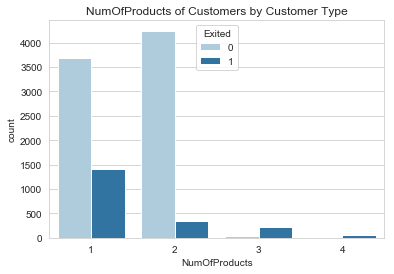

In [22]:
plot_discrete(data, 'NumOfProducts', 'Exited', 'Paired')

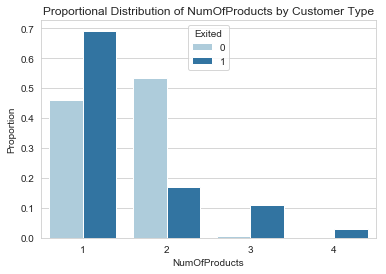

In [7]:
plot_discrete_prop(df=data, variable='NumOfProducts', hue_choice='Exited', palette_choice='Paired')

again surprisingly, churned customers tried a variety of products and decide to quit  
this is indicative of something not good with the products in this bank

churned customers are younger with higher credit score - look for better products because they already tried this bank's product maybe with their parents/family members

In [32]:
#x, y, hue = "IsActiveMember", "Proportion", "Exited"
#hue_order = [0,1]

#f, axes = plt.subplots(1, 2)
#sns.countplot(x=x, hue=hue, data=data, ax=axes[0], palette="Paired")

#prop_df = (data[x]
#           .groupby(data[hue])
#           .value_counts(normalize=True)
#           .rename(y)
#           .reset_index())

#sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1], palette="Paired")
#plt.legend(loc='best', bbox_to_anchor=(1.35, 1.0))